In [1]:
# COPPER-GOLD-RATIO PROCESSING AND CALCULATION
# RESULT IS DATE WITH A RATIO ASSOCIATED WITH IT
# AND INDICATION OF ECONOMIC EXPANSION OR CONTRACTION
import pandas as pd 
import numpy as np
from datetime import datetime
from dateutil.parser import parse

# Load both csv files
gold_file = pd.read_csv('/Users/audha/cpsc590/LBMA-GOLD.csv',usecols=(0,1))
copper_file = pd.read_csv('/Users/audha/cpsc590/LME-PR_CU.csv',usecols=(0,1))

# Grab the date and statistic from appropriate columns
gold_date = list(gold_file['Date'])
gold_date = [parse(x) for x in gold_date] # Convert date to datetime using parse library
gold_price = list(gold_file["USD (AM)"])
copper_date = list(copper_file['Date'])
copper_date = [parse(x) for x in copper_date] # Convert date to datetime using parse library
copper_price = list(copper_file['Cash Buyer'])

# Create dict for the ratio with date as key and ratio as value
copper_gold_ratio = {}
for date in range(len(gold_date)):
    copper_gold_ratio.update({gold_date[date] : (copper_price[date]/gold_price[date])})
print(copper_gold_ratio)

# Determine when copper-gold-ratio is going in direction of "expansion" or "contraction"
# When it goes up, it is an economic expansion and when it goes down, it is an economic contraction

# Create a dict for the copper_gold_indicator with key as date and values as expansion or contraction
copper_gold_indicator = {}
for i in range(len(copper_gold_ratio)-1):
    if copper_gold_ratio[gold_date[i]] > copper_gold_ratio[gold_date[i+1]]:
        copper_gold_indicator.update({gold_date[i]:"expansion"})
    else:
        copper_gold_indicator.update({gold_date[i]:"contraction"})
print(copper_gold_indicator)

{datetime.datetime(2018, 3, 29, 0, 0): 5.047964347760405, datetime.datetime(2018, 3, 28, 0, 0): 4.922262406323403, datetime.datetime(2018, 3, 27, 0, 0): 4.91689186687891, datetime.datetime(2018, 3, 26, 0, 0): 4.819786413527143, datetime.datetime(2018, 3, 23, 0, 0): 4.959585801020599, datetime.datetime(2018, 3, 22, 0, 0): 5.076193701320691, datetime.datetime(2018, 3, 21, 0, 0): 5.070080145857865, datetime.datetime(2018, 3, 20, 0, 0): 5.167015806513045, datetime.datetime(2018, 3, 19, 0, 0): 5.177250895784097, datetime.datetime(2018, 3, 16, 0, 0): 5.24411954092648, datetime.datetime(2018, 3, 15, 0, 0): 5.202705255601315, datetime.datetime(2018, 3, 14, 0, 0): 5.2941620438507115, datetime.datetime(2018, 3, 13, 0, 0): 5.2187760673390455, datetime.datetime(2018, 3, 12, 0, 0): 5.2047826912127535, datetime.datetime(2018, 3, 9, 0, 0): 5.1586008261644, datetime.datetime(2018, 3, 8, 0, 0): 5.151652331371661, datetime.datetime(2018, 3, 7, 0, 0): 5.157598499061914, datetime.datetime(2018, 3, 6, 0, 0

In [2]:
# YIELD CURVE FLATTENING PROCESSING AND CALCULATION

# Load csv file
USTreasury_file = pd.read_csv('/Users/audha/cpsc590/USTREASURY-YIELD.csv',usecols=(0,5,9))

# Grab the date and statistic from appropriate columns
treasury_date = list(USTreasury_file['Date'])
treasury_date = [parse(x) for x in treasury_date] # Convert date to datetime using parse library
two_year_yield = list(USTreasury_file['2 YR'])
ten_year_yield = list(USTreasury_file['10 YR'])

# Calculate the yield curve flatten
# When the two year yield goes up and the 10 year yield goes down, the yield curve is flatten and 
# the economy is contracting. The yield lists are descending by date as the list is iterated so
# for example 3/29/18 will be in the index date and 3/28/18 will be in the index date+1.
# When 3/29/18 > 3/28/18 for the 2 year yield meaning the 2 year yield is approaching the 10 year yield,
# and the 3/29/18 < 3/28/18 for the 10 year yield meaning the 10 year yield is approaching the 2 year yield,
# a flattening is occurring indicating a contraction in the economy.

# Create a dict for the yield_curve_flatten with key as date and values as expansion or contraction
yield_curve_flatten = {}
for date in range(len(treasury_date)-1):
    if (two_year_yield[date] > two_year_yield[date+1]) and (ten_year_yield[date] < ten_year_yield[date+1]):
        yield_curve_flatten.update({treasury_date[date]:"contraction"})        
    else:
        yield_curve_flatten.update({treasury_date[date]:"expansion"})     
print(yield_curve_flatten)

{datetime.datetime(2018, 3, 29, 0, 0): 'expansion', datetime.datetime(2018, 3, 28, 0, 0): 'contraction', datetime.datetime(2018, 3, 27, 0, 0): 'expansion', datetime.datetime(2018, 3, 26, 0, 0): 'expansion', datetime.datetime(2018, 3, 23, 0, 0): 'expansion', datetime.datetime(2018, 3, 22, 0, 0): 'expansion', datetime.datetime(2018, 3, 21, 0, 0): 'expansion', datetime.datetime(2018, 3, 20, 0, 0): 'expansion', datetime.datetime(2018, 3, 19, 0, 0): 'expansion', datetime.datetime(2018, 3, 16, 0, 0): 'expansion', datetime.datetime(2018, 3, 15, 0, 0): 'expansion', datetime.datetime(2018, 3, 14, 0, 0): 'expansion', datetime.datetime(2018, 3, 13, 0, 0): 'expansion', datetime.datetime(2018, 3, 12, 0, 0): 'expansion', datetime.datetime(2018, 3, 9, 0, 0): 'expansion', datetime.datetime(2018, 3, 8, 0, 0): 'expansion', datetime.datetime(2018, 3, 7, 0, 0): 'expansion', datetime.datetime(2018, 3, 6, 0, 0): 'expansion', datetime.datetime(2018, 3, 5, 0, 0): 'expansion', datetime.datetime(2018, 3, 2, 0, 

In [3]:
# The 10 Conference Board's Leading Economic Index Indicators
# All csv files are preprocessed here and oddities in the data are cleaned up when
# necessary.  All dates are parsed into a datetime format to combine objects together
# easily.  

# Average weekly hours, manufacturing (monthly data)
AWHMAN_file = pd.read_csv('/Users/audha/cpsc590/CSV Files/AWHMAN.csv',usecols=(0,1))
AWHMAN_date = list(AWHMAN_file['DATE'])
AWHMAN_date = [parse(x) for x in AWHMAN_date]
AWHMAN_stat = list(AWHMAN_file['AWHMAN'])

# List to store all the final diffusion indexes and then classification of 
# "expansion" or "contraction".  It is the same size as the smallest dataset AWHMAN.
conference_board_date = AWHMAN_date # using AWHMAN_date as base for all indicators.

# Manufacturers' New Orders for Consumer Goods (monthly data) 
ACOGNO_file = pd.read_csv('/Users/audha/cpsc590/CSV Files/ACOGNO.csv',usecols=(0,1))
ACOGNO_date = list(ACOGNO_file['DATE'])
ACOGNO_date = [parse(x) for x in ACOGNO_date]
ACOGNO_stat = list(ACOGNO_file['ACOGNO'])

# ISM® Index of New Orders
ISMMAN_file = pd.read_csv('/Users/audha/cpsc590/CSV Files/ISM-MAN_NEWORDERS.csv',usecols=(0,5))
ISMMAN_date = list(ISMMAN_file['Date'])
ISMMAN_date = [parse(x) for x in ISMMAN_date]
ISMMAN_stat = list(ISMMAN_file['Index'])

# Manufacturers' new orders, nondefense capital goods excluding aircraft orders (monthly data)
NEWORDER_file = pd.read_csv('/Users/audha/cpsc590/CSV Files/NEWORDER.csv',usecols=(0,1))
NEWORDER_date = list(NEWORDER_file['DATE'])
NEWORDER_date = [parse(x) for x in NEWORDER_date]
NEWORDER_stat = list(NEWORDER_file['NEWORDER'])

# Building permits, new private housing units (monthly data)
PERMIT_file = pd.read_csv('/Users/audha/cpsc590/CSV Files/PERMIT.csv',usecols=(0,1))
PERMIT_date = list(PERMIT_file['DATE'])
PERMIT_date = [parse(x) for x in PERMIT_date]
PERMIT_stat = list(PERMIT_file['PERMIT'])

# Leading Credit Index™ (monthly data)
USSLIND_file = pd.read_csv('/Users/audha/cpsc590/CSV Files/USSLIND.csv',usecols=(0,1))
USSLIND_date = list(USSLIND_file['DATE'])
USSLIND_date = [parse(x) for x in USSLIND_date]
USSLIND_stat = list(USSLIND_file['USSLIND'])

# Average consumer expectations for business conditions (monthly data)
cons_expect_file = pd.read_csv('/Users/audha/cpsc590/CSV Files/average_cons_expect.csv',usecols=(0,5,6))
cons_expect_location = list(cons_expect_file['LOCATION'])
cons_expect_date = list(cons_expect_file['TIME'])
# Format of date was Year-month in csv file so using strptime here
cons_expect_date = [datetime.strptime(x, '%Y-%m') for x in cons_expect_date]
cons_expect_stat = list(cons_expect_file['Value'])

# Average weekly initial claims for unemployment insurance (weekly data)
av_wk_claim_file = pd.read_csv('/Users/audha/cpsc590/CSV Files/av_wk_claim_unemp_ins.csv',usecols=(0,1))
av_wk_claim_date = list(av_wk_claim_file['Date'])
av_wk_claim_date = [parse(x) for x in av_wk_claim_date]
av_wk_claim_stat = list(av_wk_claim_file["N.S.A"])
# Replace commas in string and convert to int
for x in range(len(av_wk_claim_stat)):
    av_wk_claim_stat[x] = int(av_wk_claim_stat[x].replace(',',''))

# Interest rate spread, 10-year Treasury bonds less federal funds (daily data)
T10YFF_file = pd.read_csv('/Users/audha/cpsc590/CSV Files/T10YFF.csv',usecols=(0,1))
T10YFF_date = list(T10YFF_file['DATE'])
T10YFF_date = [parse(x) for x in T10YFF_date]
T10YFF_stat = list(T10YFF_file['T10YFF'])
updated_T10YFF_date = []
updated_T10YFF_stat = []
# Remove all dates and stats that have null value '.' in them
for i in range(len(T10YFF_stat)):
    if T10YFF_stat[i] != '.':
        updated_T10YFF_date.append(T10YFF_date[i])
        updated_T10YFF_stat.append(float(T10YFF_stat[i]))

# Stock prices, 500 common stocks (daily data)
SP500_file = pd.read_csv('/Users/audha/cpsc590/CSV Files/SP500.csv',usecols=(0,1))
SP500_date = list(SP500_file['DATE'])
SP500_date = [parse(x) for x in SP500_date]
SP500_stat = list(SP500_file['SP500'])
updated_SP500_date = []
updated_SP500_stat = []
# Remove all dates and stats that have null value '.' in them
for i in range(len(SP500_stat)):
    if SP500_stat[i] != '.':
        updated_SP500_date.append(SP500_date[i])
        updated_SP500_stat.append(float(SP500_stat[i]))

# START OF CALCULATING WHETHER INDICATOR STATISTIC IS SIGNIFICANTLY CHANGING USING
# CONFERENCE BOARD LEADING ECONOMIC INDEX FORMULA WHERE IF A CHANGE FROM ONE STATISTIC
# TO ANOTHER STATISTIC IS GREATER THAN 0.05%, A DATE WILL RECEIVE A VALUE 1.0.  IF IT IS
# BETWEEN 0.05% AND -0.05% A DATE WILL RECEIVE A VALUE 0.5. IF IT IS LESS THAN -0.5%, A 
# DATE WILL RECEIVE A VALUE OF 0.0.

# Conference board change will be a dictionary of dictionaries with a final result of
# storing the months with either "expansion" or "contraction".  Each inside dictionary 
# will start out with a date as the key and a float number value as explained above
# that is added to as a value for each of the ten indicators is determined.

conference_board_change = {}

# Monthly indicators have a statistic for an entire month.  Weekly and daily indicators are 
# combined and a monthly statistic is determined from the weekly or daily data.

# Number 1: Average weekly hours, manufacturing (monthly data)

# Initial statistic will initialize the dictionary with date keys and initial value.
# Subsequent indicators will append to this dictionary in the appropriate key and add
# to the appropriate value under that key.
for date in range(len(AWHMAN_date)-1):
    if (((AWHMAN_stat[date+1] - AWHMAN_stat[date])/AWHMAN_stat[date])*100) >= 0.05:
        conference_board_change.update({conference_board_date[date]:1.0})        
    # Using absolute values so that a negative value betweet 0.0 and 0.05 will be the same as
    # a positive value between 0.0 and 0.05 thus covering the range from -0.05 to +0.05
    elif (np.abs((((AWHMAN_stat[date+1] - AWHMAN_stat[date])/AWHMAN_stat[date])*100)) < 0.05) and \
         (np.abs((((AWHMAN_stat[date+1] - AWHMAN_stat[date])/AWHMAN_stat[date])*100)) >= 0.0):   
        conference_board_change.update({conference_board_date[date]:0.5})
    else:
        conference_board_change.update({conference_board_date[date]:0.0})

# Number 2: Manufacturers' New Orders for Consumer Goods (monthly data)        
for date in range(len(ACOGNO_date)-1):        
    if (((ACOGNO_stat[date+1] - ACOGNO_stat[date])/ACOGNO_stat[date])*100) >= 0.05:
        conference_board_change[conference_board_date[date]] += 1.0
    # Using absolute values so that a negative value betweet 0.0 and 0.05 will be the same as
    # a positive value between 0.0 and 0.05 thus covering the range from -0.05 to +0.05    
    elif (np.abs((((ACOGNO_stat[date+1] - ACOGNO_stat[date])/ACOGNO_stat[date])*100)) < 0.05) and \
         (np.abs((((ACOGNO_stat[date+1] - ACOGNO_stat[date])/ACOGNO_stat[date])*100)) >= 0.0):   
        conference_board_change[conference_board_date[date]] += 0.5
    else:
        conference_board_change[conference_board_date[date]] += 0.0   
        
# Number 3: ISM® Index of New Orders (monthly data)    
# Initialize dictionary for ISMMAN because dates are descending in order while other indicator dates
# are ascending.  Need to do this to maintain month to month changes that are consisent with the other
# indicators.
ISMMAN_change = {ISMMAN_date[0]:0.0}
for date in range(len(ISMMAN_date)-1):
    if (((ISMMAN_stat[date] - ISMMAN_stat[date+1])/ISMMAN_stat[date+1])*100) >= 0.05:
        ISMMAN_change.update({ISMMAN_date[date]:1.0})        
    # Using absolute values so that a negative value betweet 0.0 and 0.05 will be the same as
    # a positive value between 0.0 and 0.05 thus covering the range from -0.05 to +0.05    
    elif (np.abs((((ISMMAN_stat[date+1] - ISMMAN_stat[date])/ISMMAN_stat[date])*100)) < 0.05) and \
         (np.abs((((ISMMAN_stat[date+1] - ISMMAN_stat[date])/ISMMAN_stat[date])*100)) >= 0.0):
        ISMMAN_change.update({ISMMAN_date[date]:0.5})
    else:
        ISMMAN_change.update({ISMMAN_date[date]:0.0})

# Append the ISMMAN values into the conference board date dictionary        
for date in range(len(conference_board_change)):
    if conference_board_date[date] in ISMMAN_change:
        conference_board_change[conference_board_date[date]] += ISMMAN_change[conference_board_date[date]] 
        
# Number 4: Manufacturers orders, nondefense capital goods excluding aircraft orders (monthly data)    
for date in range(len(NEWORDER_date)-1):        
    if (((NEWORDER_stat[date+1] - NEWORDER_stat[date])/NEWORDER_stat[date])*100) >= 0.05:
        conference_board_change[conference_board_date[date]] += 1.0
    # Using absolute values so that a negative value betweet 0.0 and 0.05 will be the same as
    # a positive value between 0.0 and 0.05 thus covering the range from -0.05 to +0.05    
    elif (np.abs((((NEWORDER_stat[date+1] - NEWORDER_stat[date])/NEWORDER_stat[date])*100)) < 0.05) and \
         (np.abs((((NEWORDER_stat[date+1] - NEWORDER_stat[date])/NEWORDER_stat[date])*100)) >= 0.0):   
        conference_board_change[conference_board_date[date]] += 0.5
    else:
        conference_board_change[conference_board_date[date]] += 0.0
    
# Number 5: Building permits, new private housing units (monthly data)

# csv file starts at 1960.  Need to iterate through CSV data to find all data that is also in the 
# conference board change dictionary.
updated_PERMIT_date = []
updated_PERMIT_stat = []
for date in range(len(PERMIT_date)):
    if PERMIT_date[date] in conference_board_change:
        updated_PERMIT_date.append(PERMIT_date[date])
        updated_PERMIT_stat.append(PERMIT_stat[date])

for date in range(len(conference_board_change)-1):    
    if (((updated_PERMIT_stat[date+1] - updated_PERMIT_stat[date])/updated_PERMIT_stat[date])*100) >= 0.05:
        conference_board_change[conference_board_date[date]] += 1.0   
    # Using absolute values so that a negative value betweet 0.0 and 0.05 will be the same as
    # a positive value between 0.0 and 0.05 thus covering the range from -0.05 to +0.05  
    elif (np.abs((((updated_PERMIT_stat[date+1] - updated_PERMIT_stat[date])/updated_PERMIT_stat[date])*100)) < 0.05) and \
         (np.abs((((updated_PERMIT_stat[date+1] - updated_PERMIT_stat[date])/updated_PERMIT_stat[date])*100)) >= 0.0):
        conference_board_change[conference_board_date[date]] += 0.5
    else:
        conference_board_change[conference_board_date[date]] += 0.0
        
# Number 6: Leading Credit Index™ (monthly data)
for date in range(len(conference_board_change)-1):    
    if (((USSLIND_stat[date+1] - USSLIND_stat[date])/USSLIND_stat[date])*100) >= 0.05:
        conference_board_change[conference_board_date[date]] += 1.0    
    # Using absolute values so that a negative value betweet 0.0 and 0.05 will be the same as
    # a positive value between 0.0 and 0.05 thus covering the range from -0.05 to +0.05  
    elif (np.abs((((USSLIND_stat[date+1] - USSLIND_stat[date])/USSLIND_stat[date])*100)) < 0.05) and \
         (np.abs((((USSLIND_stat[date+1] - USSLIND_stat[date])/USSLIND_stat[date])*100)) >= 0.0):
        conference_board_change[conference_board_date[date]] += 0.5
    else:
        conference_board_change[conference_board_date[date]] += 0.0
        
# Number 7: Average consumer expectations for business conditions (monthly data)

# csv file contains data from other countries.  Will start for 'USA' as location and then find data 
# under USA that is also in the conference_board_change dictionary
updated_cons_expect_date = []
updated_cons_expect_stat = []
for i in range(len(cons_expect_location)):
    if (cons_expect_location[i]=='USA'): 
        if cons_expect_date[i] in conference_board_change:
            updated_cons_expect_date.append(cons_expect_date[i])
            updated_cons_expect_stat.append(cons_expect_stat[i])
for date in range(len(conference_board_change)-1):    
    if (((updated_cons_expect_stat[date+1] - updated_cons_expect_stat[date])/updated_cons_expect_stat[date])*100) >= 0.05:
        conference_board_change[conference_board_date[date]] += 1.0 
    # Using absolute values so that a negative value betweet 0.0 and 0.05 will be the same as
    # a positive value between 0.0 and 0.05 thus covering the range from -0.05 to +0.05  
    elif (np.abs((((updated_cons_expect_stat[date+1] - updated_cons_expect_stat[date])/updated_cons_expect_stat[date])*100)) < 0.05) and \
         (np.abs((((updated_cons_expect_stat[date+1] - updated_cons_expect_stat[date])/updated_cons_expect_stat[date])*100)) >= 0.0):
        conference_board_change[conference_board_date[date]] += 0.5
    else:
        conference_board_change[conference_board_date[date]] += 0.0

# Number 8: Average weekly initial claims for unemployment insurance (weekly data)

# Because this is weekly data, weekly changes are calculated first using the Conference Board's Leading Economic Index
# formula for the weekly change. All the week values, a 1.0, 0.5, or 0.0 are added together initial for the entire month
# and total is divided by number of weeks in the month to get a month total value.  If the total is less than 0.5, the 
# month gets a 0.0, if the total is exactly 0.5, it gets a 0.5 and if it is greater than 0.5 it gets a 1.0. This total 
# value will be equivalent to a value of the monthly indicators since it totals up the week changes of an entire month.

av_wk_claim_date_change = [] # Store the months so they can be appended to the conference_board_change dictionary later
av_wk_claim_count = [] # Store final values for each month so they can be appended to the conference_board_change
                       # dictionary later.
values = 0.0 # Used to add all the values of a change 
week_count = 0 # Number of weeks in the month will added to after a weekly change has been determined
for date in range(len(av_wk_claim_date)-1):  
    if (av_wk_claim_date[date+1].month == av_wk_claim_date[date].month):
        if (((av_wk_claim_stat[date+1] - av_wk_claim_stat[date])/av_wk_claim_stat[date])*100) >= 0.05:
            values += 1.0
        # Using absolute values so that a negative value betweet 0.0 and 0.05 will be the same as
        # a positive value between 0.0 and 0.05 thus covering the range from -0.05 to +0.05  
        elif (np.abs((((av_wk_claim_stat[date+1] - av_wk_claim_stat[date])/av_wk_claim_stat[date])*100)) < 0.05) and \
             (np.abs((((av_wk_claim_stat[date+1] - av_wk_claim_stat[date])/av_wk_claim_stat[date])*100)) >= 0.0):
            values += 0.5
        else:
            values += 0.0
        week_count += 1
    else: # Need to add the last week of the month into the values.
        if (((av_wk_claim_stat[date+1] - av_wk_claim_stat[date])/av_wk_claim_stat[date])*100) >= 0.05:
            values += 1.0
        # Using absolute values so that a negative value betweet 0.0 and 0.05 will be the same as
        # a positive value between 0.0 and 0.05 thus covering the range from -0.05 to +0.05  
        elif (np.abs((((av_wk_claim_stat[date+1] - av_wk_claim_stat[date])/av_wk_claim_stat[date])*100)) < 0.05) and \
             (np.abs((((av_wk_claim_stat[date+1] - av_wk_claim_stat[date])/av_wk_claim_stat[date])*100)) >= 0.0):
            values += 0.5
        else:
            values += 0.0
        week_count += 1
        # Append the monthly date
        av_wk_claim_date_change.append(av_wk_claim_date[date])
        # Determine the monthly change from all the weeks in the month
        final_values = values/week_count
        if final_values < 0.5:
            stat = 0.0
        elif final_values > 0.5:
            stat = 1.0
        else:
            stat = 0.5
        # Append the final value
        av_wk_claim_count.append(stat)
        # Reinitialize variables for next week
        values = 0.0   
        week_count = 0
# Append the final value results to the conference_board_change dictionary making sure the year and month
# exists in the dictionary.
for date in range(len(conference_board_change)):
    if (conference_board_date[date].year == av_wk_claim_date_change[date].year) and \
        (conference_board_date[date].month == av_wk_claim_date_change[date].month):
        conference_board_change[conference_board_date[date]] += av_wk_claim_count[date]

# Number 9: Interest rate spread, 10-year Treasury bonds less federal funds (daily data)

# Because this is daily data, weekly changes are calculated first using the Conference Board's Leading Economic Index
# formula for the daily change. All the daily values, a 1.0, 0.5, or 0.0 are added together initial for the entire month
# and total is divided by number of days in the month to get a month total value.  If the total is less than 0.5, the 
# month gets a 0.0, if the total is exactly 0.5, it gets a 0.5 and if it is greater than 0.5 it gets a 1.0. This total 
# value will be equivalent to a value of the monthly indicators since it totals up the week changes of an entire month.

updated_T10YFF_date_change = [] # Store the months so they can be appended to the conference_board_change dictionary later
updated_T10YFF_count = []  # Store final values for each month so they can be appended to the conference_board_change
                           # dictionary later.
values = 0.0 # Used to add all the values of a change 
daily_count = 0 # Number of days in the month will added to after a daily change has been determined
for date in range(len(updated_T10YFF_date)-1):  
    if (updated_T10YFF_date[date+1].month == updated_T10YFF_date[date].month):
        if (((updated_T10YFF_stat[date+1] - updated_T10YFF_stat[date])/updated_T10YFF_stat[date])*100) >= 0.05:
            values += 1.0
        # Using absolute values so that a negative value betweet 0.0 and 0.05 will be the same as
        # a positive value between 0.0 and 0.05 thus covering the range from -0.05 to +0.05  
        elif (np.abs((((updated_T10YFF_stat[date+1] - updated_T10YFF_stat[date])/updated_T10YFF_stat[date])*100)) < 0.05) and \
             (np.abs((((updated_T10YFF_stat[date+1] - updated_T10YFF_stat[date])/updated_T10YFF_stat[date])*100)) >= 0.0):
            values += 0.5
        else:
            values += 0.0
        daily_count += 1
    else: # Need to add the last day of the month into the values.
        if (((updated_T10YFF_stat[date+1] - updated_T10YFF_stat[date])/updated_T10YFF_stat[date])*100) >= 0.05:
            values += 1.0
        # Using absolute values so that a negative value betweet 0.0 and 0.05 will be the same as
        # a positive value between 0.0 and 0.05 thus covering the range from -0.05 to +0.05  
        elif (np.abs((((updated_T10YFF_stat[date+1] - updated_T10YFF_stat[date])/updated_T10YFF_stat[date])*100)) < 0.05) and \
             (np.abs((((updated_T10YFF_stat[date+1] - updated_T10YFF_stat[date])/updated_T10YFF_stat[date])*100)) >= 0.0):
            values += 0.5
        else:
            values += 0.0
        daily_count += 1
        # Append the monthly date
        updated_T10YFF_date_change.append(updated_T10YFF_date[date])
        # Determine the monthly change from all the days in the month
        total_values = values/daily_count
        if total_values < 0.5:
            stat = 0.0
        elif total_values > 0.5:
            stat = 1.0
        else:
            stat = 0.5
        # Append the final value
        updated_T10YFF_count.append(stat)
        # Reinitialize variables for next day
        values = 0.0   
        daily_count = 0
        
# Append the final value results to the conference_board_change dictionary making sure the year and month
# exists in the dictionary.
for date in range(len(conference_board_change)):
    if (conference_board_date[date].year == updated_T10YFF_date_change[date].year) and \
        (conference_board_date[date].month == updated_T10YFF_date_change[date].month):
        conference_board_change[conference_board_date[date]] += updated_T10YFF_count[date]
        
# Number 10: Stock prices, 500 common stocks (daily data)

# Because this is daily data, weekly changes are calculated first using the Conference Board's Leading Economic Index
# formula for the daily change. All the daily values, a 1.0, 0.5, or 0.0 are added together initial for the entire month
# and total is divided by number of days in the month to get a month total value.  If the total is less than 0.5, the 
# month gets a 0.0, if the total is exactly 0.5, it gets a 0.5 and if it is greater than 0.5 it gets a 1.0. This total 
# value will be equivalent to a value of the monthly indicators since it totals up the week changes of an entire month.

updated_SP500_date_change = [] # Store the months so they can be appended to the conference_board_change dictionary later
updated_SP500_count = [] # Store final values for each month so they can be appended to the conference_board_change
                         # dictionary later.
values = 0.0 # Used to add all the values of a change 
daily_count = 0 # Number of days in the month will added to after a daily change has been determined
for date in range(len(updated_SP500_date)-1):  
    if (updated_SP500_date[date+1].month == updated_SP500_date[date].month):
        if (((updated_SP500_stat[date+1] - updated_SP500_stat[date])/updated_SP500_stat[date])*100) >= 0.05:
            values += 1.0
        # Using absolute values so that a negative value betweet 0.0 and 0.05 will be the same as
        # a positive value between 0.0 and 0.05 thus covering the range from -0.05 to +0.05  
        elif (np.abs((((updated_SP500_stat[date+1] - updated_SP500_stat[date])/updated_SP500_stat[date])*100)) < 0.05) and \
             (np.abs((((updated_SP500_stat[date+1] - updated_SP500_stat[date])/updated_SP500_stat[date])*100)) >= 0.0):
            values += 0.5
        else:
            values += 0.0
        daily_count += 1
    else: # Need to add the last day of the month into the values.
        if (((updated_SP500_stat[date+1] - updated_SP500_stat[date])/updated_SP500_stat[date])*100) >= 0.05:
            values += 1.0
        # Using absolute values so that a negative value betweet 0.0 and 0.05 will be the same as
        # a positive value between 0.0 and 0.05 thus covering the range from -0.05 to +0.05  
        elif (np.abs((((updated_SP500_stat[date+1] - updated_SP500_stat[date])/updated_SP500_stat[date])*100)) < 0.05) and \
             (np.abs((((updated_SP500_stat[date+1] - updated_SP500_stat[date])/updated_SP500_stat[date])*100)) >= 0.0):
            values += 0.5
        else:
            values += 0.0
        daily_count += 1
        updated_SP500_date_change.append(updated_SP500_date[date])
        # Determine the monthly change from all the days in the month
        total_values = values/daily_count
        if total_values < 0.5:
            stat = 0.0
        elif total_values > 0.5:
            stat = 1.0
        else:
            stat = 0.5
        # Append the final value
        updated_SP500_count.append(stat)
        # Reinitialize variables for next day
        count = 0.0   
        daily_count = 0

# Append the final value results to the conference_board_change dictionary making sure the year and month
# exists in the dictionary.
for date in range(len(conference_board_change)):
    if (conference_board_date[date].year == updated_SP500_date_change[date].year) and \
        (conference_board_date[date].month == updated_SP500_date_change[date].month):
        conference_board_change[conference_board_date[date]] += updated_SP500_count[date]

# Print the dictionary with the final values after all 10 indicators have been added to the dictionary
print("Final", conference_board_change)

# Determine if the Conference Board's Leading economic indicator is an "expansion' or "contraction"
# for each date.  A value equal to and above 5.0 is "expansion" and a value less than 5.0 is "contraction". 
for date in range(len(conference_board_change)):
    if conference_board_change[conference_board_date[date]] >= 5.0:
        conference_board_change[conference_board_date[date]] = "expansion"
    else:
        conference_board_change[conference_board_date[date]] = "contraction"
print(conference_board_change)  

Final {datetime.datetime(2017, 1, 1, 0, 0): 5.0, datetime.datetime(2017, 2, 1, 0, 0): 5.0, datetime.datetime(2017, 3, 1, 0, 0): 6.0, datetime.datetime(2017, 4, 1, 0, 0): 3.5, datetime.datetime(2017, 5, 1, 0, 0): 4.5, datetime.datetime(2017, 6, 1, 0, 0): 8.0, datetime.datetime(2017, 7, 1, 0, 0): 5.5, datetime.datetime(2017, 8, 1, 0, 0): 5.5, datetime.datetime(2017, 9, 1, 0, 0): 9.0, datetime.datetime(2017, 10, 1, 0, 0): 6.0, datetime.datetime(2017, 11, 1, 0, 0): 3.5, datetime.datetime(2017, 12, 1, 0, 0): 7.0, datetime.datetime(2018, 1, 1, 0, 0): 4.0}
{datetime.datetime(2017, 1, 1, 0, 0): 'expansion', datetime.datetime(2017, 2, 1, 0, 0): 'expansion', datetime.datetime(2017, 3, 1, 0, 0): 'expansion', datetime.datetime(2017, 4, 1, 0, 0): 'contraction', datetime.datetime(2017, 5, 1, 0, 0): 'contraction', datetime.datetime(2017, 6, 1, 0, 0): 'expansion', datetime.datetime(2017, 7, 1, 0, 0): 'expansion', datetime.datetime(2017, 8, 1, 0, 0): 'expansion', datetime.datetime(2017, 9, 1, 0, 0): 'e

In [4]:
#COMBINE ALL INDICATORS INTO ONE ECONOMIC DATA DICTIONARY
economic_data = {}
print (len(copper_gold_indicator))
print (len(yield_curve_flatten))

copper_gold_indicator_keys = list(copper_gold_indicator.keys())
yield_curve_flatten_keys = list(yield_curve_flatten.keys())

# Combine the copper-gold-ratio and yield curve flatten values into economic data once the dates match
for i in range(len(yield_curve_flatten_keys)):
    if yield_curve_flatten_keys[i] in copper_gold_indicator_keys:
        economic_data.update({yield_curve_flatten_keys[i]:[copper_gold_indicator[yield_curve_flatten_keys[i]], \
                                                           yield_curve_flatten[yield_curve_flatten_keys[i]]]})
        
# Add Conference Board's Leading Economic Index's result to the economic data list
for conf_key in conference_board_change.keys():
    for econ_key in economic_data.keys():
        if (conf_key.month == econ_key.month) and (conf_key.year == econ_key.year):
            economic_data[econ_key].append(conference_board_change[conf_key])
# Print out all of the combined economic data
print (economic_data)      

301
299
{datetime.datetime(2018, 3, 29, 0, 0): ['expansion', 'expansion'], datetime.datetime(2018, 3, 28, 0, 0): ['expansion', 'contraction'], datetime.datetime(2018, 3, 27, 0, 0): ['expansion', 'expansion'], datetime.datetime(2018, 3, 26, 0, 0): ['contraction', 'expansion'], datetime.datetime(2018, 3, 23, 0, 0): ['contraction', 'expansion'], datetime.datetime(2018, 3, 22, 0, 0): ['expansion', 'expansion'], datetime.datetime(2018, 3, 21, 0, 0): ['contraction', 'expansion'], datetime.datetime(2018, 3, 20, 0, 0): ['contraction', 'expansion'], datetime.datetime(2018, 3, 19, 0, 0): ['contraction', 'expansion'], datetime.datetime(2018, 3, 16, 0, 0): ['expansion', 'expansion'], datetime.datetime(2018, 3, 15, 0, 0): ['contraction', 'expansion'], datetime.datetime(2018, 3, 14, 0, 0): ['expansion', 'expansion'], datetime.datetime(2018, 3, 13, 0, 0): ['expansion', 'expansion'], datetime.datetime(2018, 3, 12, 0, 0): ['expansion', 'expansion'], datetime.datetime(2018, 3, 9, 0, 0): ['expansion', 'e

In [5]:
# CLASSIFY DATE AS "E" for "expansion" and "C" for "contraction" BASED ON MAJORITY IN THE TRIPLE
# Note: Some of the Conference Board Leading Economic Indicator data does not exist with the rest of the indicators. 
# The triples start at 1/31/2018 and descend to 1/20/2017
for date,values in economic_data.items():
    count = 0    
    if len(values) == 3: # Only classify if three classifications exist. 
        if values[0] == "expansion":
            count +=1
        if values[1] == "expansion":
            count +=1
        if values[2] == "expansion":
            count +=1
        if count >=2: # Majority is 2
            values.insert(0,"E")
        else:
            values.insert(0,"C")
# Show results
print (economic_data) 

{datetime.datetime(2018, 3, 29, 0, 0): ['expansion', 'expansion'], datetime.datetime(2018, 3, 28, 0, 0): ['expansion', 'contraction'], datetime.datetime(2018, 3, 27, 0, 0): ['expansion', 'expansion'], datetime.datetime(2018, 3, 26, 0, 0): ['contraction', 'expansion'], datetime.datetime(2018, 3, 23, 0, 0): ['contraction', 'expansion'], datetime.datetime(2018, 3, 22, 0, 0): ['expansion', 'expansion'], datetime.datetime(2018, 3, 21, 0, 0): ['contraction', 'expansion'], datetime.datetime(2018, 3, 20, 0, 0): ['contraction', 'expansion'], datetime.datetime(2018, 3, 19, 0, 0): ['contraction', 'expansion'], datetime.datetime(2018, 3, 16, 0, 0): ['expansion', 'expansion'], datetime.datetime(2018, 3, 15, 0, 0): ['contraction', 'expansion'], datetime.datetime(2018, 3, 14, 0, 0): ['expansion', 'expansion'], datetime.datetime(2018, 3, 13, 0, 0): ['expansion', 'expansion'], datetime.datetime(2018, 3, 12, 0, 0): ['expansion', 'expansion'], datetime.datetime(2018, 3, 9, 0, 0): ['expansion', 'expansion

In [6]:
#REDUCE TWEETS TO SIGNIFICANT WORDS
# Goes through the process of cleaning up tweet and reducing the tweet down to the significant words.
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import numpy as np
from datetime import datetime
from dateutil.parser import parse
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import re

tweets = pd.read_csv('/Users/audha/cpsc590/Trump_tweets.csv')

#Gets rid of extraneous characters
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = re.sub('[\W]+', ' ', text.lower()) +\
        ' '.join(emoticons).replace('-', '')
    return text
tweets['text'] = tweets['text'].apply(preprocessor)

# Retrieve all the english stop words according to nltk library
stop = stopwords.words('english')
stop = stop + [u'a',u'b',u'c',u'd',u'e',u'f',u'g',u'h',u'i',u'j',u'k',u'l',u'm',u'n',u'o',u'p',u'q',u'r',u's',u't',u'v',u'w',u'x',u'y',u'z']

# Splits up all the words separated by commas then take out all stop words from tweet as it lemmatizes the words
def split_into_lemmas(tweets):
    words = TextBlob(tweets).words
    # for each word, take its "base form" = lemma 
    return [word.lemma for word in words if word not in stop]

# Store all the significant words tweets
significant_words = tweets.text.apply(split_into_lemmas)

# Create a list of tweet dates from the date column in csv file that will correspond to each tweet. 
tweet_date = []
for i in range(len(tweets)):
    tweet_date.append(str(tweets['created_at'][i]))
tweet_date = [datetime.strptime(x, "%m/%d/%Y %H:%M") for x in tweet_date] #Convert date to datetime using strptime lib
# Replace hours and minutes so the dates match the other dates for economic data
for i in range(len(tweet_date)):
    tweet_date[i] = tweet_date[i].replace(hour=0, minute=0)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\audha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\audha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\audha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
# PREPARE A TEXT FILE OF TWEET WORDS FOR MAPREDUCE IN SPARK
# Sending all words one by one from all of the tweets into one text file.
collected_tweet_words = open('/Users/audha/cpsc590/tweet_words.txt','w')
for item in significant_words:
    for j in range(len(item)):
        collected_tweet_words.write("%s " % item[j])
collected_tweet_words.close()

In [8]:
# COMBINE TWEETS BY DATE
# There are many circumstances where there is more than one tweet in a day and days where there are no tweets.
# Since we are relating all tweets to a date of economic activity, I am combining all tweets on a date into one list.
combined_date_tweets = {}
temp_words = [] # Temporary storage of combined tweets
for i in range (len(tweet_date)-1):
    # Append to temp_words the first tweet of a new date.  
    for j in range(len(significant_words[i])):
        temp_words.append(significant_words[i][j])
    # If the day of the date changes while iterating,update the tweet_date with temp_words
    # which contain the significant tweet words for the entire day. 
    if (tweet_date[i].day != tweet_date[i+1].day):
        combined_date_tweets.update({tweet_date[i]:temp_words}) 
        # Reinitialize the temp_words storage for new day
        temp_words = []
#Include last tweet because of index out of range error 
for i in range(len(significant_words[len(tweet_date)-1])):
    temp_words.append(significant_words[len(tweet_date)-1][i])
combined_date_tweets.update({tweet_date[len(tweet_date)-1]:temp_words})
#print (combined_date_tweets)

        

In [9]:
#ADD TWEETS BY DATE TO ECONOMIC DATA DATES.  ALL WEEKEND TWEETS ARE ADDED TO THE NEXT KNOWN ECONOMIC DATA DAY.
#TOOK A LONG TIME TO FIGURE THIS OUT.  
combined_date_tweets_keys = list(combined_date_tweets.keys())
for tweet_key in range(len(combined_date_tweets_keys)):
    # See of a tweet date has an associated economic data date.
    if combined_date_tweets_keys[tweet_key] in economic_data:
        #print("indate",combined_date_tweets_keys[tweet_key],combined_date_tweets[combined_date_tweets_keys[tweet_key]])
        # Append to the economic_data values list one word at a time.  This is necessary in order to count all the words in a 
        # list when enumerating through the data with a frequency word
        for i in range(len(combined_date_tweets[combined_date_tweets_keys[tweet_key]])):
            economic_data[combined_date_tweets_keys[tweet_key]].append(combined_date_tweets[combined_date_tweets_keys[tweet_key]][i])
    else: # It doesn't have an economic data, need to find the next day in the calendar there is an economic data and 
          # combine that data with other tweets from that economic data day.
        count = 0
        # iterate through tweet date until an economic data date matches. For example, if 1/28/2018 is a weekend then count back
        # 1 day to 1/29/2018, a date that has economic data and again for 1/27/2018 where it is 2 days away from a date with 
        # economic data
        while not(combined_date_tweets_keys[tweet_key- count] in economic_data):
            #print("while", combined_date_tweets_keys[tweet_key])
            count += 1
            #print("count",count)
        #print("date",combined_date_tweets_keys[tweet_key], combined_date_tweets_keys[tweet_key-count])
        #print( combined_date_tweets_keys[tweet_key-count],combined_date_tweets[combined_date_tweets_keys[tweet_key]])
        # Append to the economic_data values list one word at a time.  This is necessary in order to count all the words in a 
        # list when enumerating through the data with a frequency word
        for i in range(len(combined_date_tweets[combined_date_tweets_keys[tweet_key]])):
            economic_data[combined_date_tweets_keys[tweet_key-count]].append(combined_date_tweets[combined_date_tweets_keys[tweet_key]][i])  
                        

In [10]:
#print(economic_data)

In [11]:
# RESULTS OF MAPREDUCE WITH WORD FREQUENCIES IS NOW PARSED AND STORED IN A WORD LIST AND NUMBER LIST
# ALL OF THE WORDS THAT OCCUR ONLY ONCE ARE NOT INCLUDED.
word_counts_file = open('/Users/audha/cpsc590/word_counts.txt','r')
word = []
number = []
stop = True # Stop once number is '1'.
for line in word_counts_file:
    if stop:
        for i in range(len(line)):
            # Parse the word
            if line[i] == "'" and i > 3:
                word.append(line[3:i])
            # Parse the number
            if line[i] == " ":
                number.append(line[i+1:-2])
                # Determine if number is '1'
                if line[i+1:-2] == '1':
                    stop = False
word_counts_file.close()

In [12]:
#OBTAIN PERCENTAGE OF TWEETS WITH EXPANSION TAG AND PERCENTAGE OF TWEETS WITH CONTRACTION TAG
e_count = 0
c_count = 0
total_count = 0
for date,values in economic_data.items():
    if (len(values) > 5): # Need to iterate through incomplete data in economic data     
        if values[0] == 'E':
            e_count += 1
        else:
            c_count += 1
        total_count += 1
print ("Percentage Expansion = ", e_count/total_count*100)
print ("Percentage Contraction = ", c_count/total_count*100)

Percentage Expansion =  80.97165991902834
Percentage Contraction =  19.02834008097166


In [13]:
# DETERMINE FOR EACH WORD THE PERCENTAGE THAT ARE "expansion" AND PERCENTAGE THAT ARE "contraction"
tweet_list = [] # Needed to enumerate and count all of the matching words in the specific date where
                # there is a match.
expansion_count = [] # List of the number of expansion classifications for a particular word for data frame
contraction_count = [] # List of the number of contraction classifications for a particular word for data frame
percent_expansion = [] # List of calculated percentages of expansion for data frame
percent_contraction = [] #List of calculated percentages of contraction for data frame
# Initialize counters for each economic status
count_e = 0
count_c = 0
for item in word:
    #print (item)
    for date,values in economic_data.items():
        if (len(values) > 5): # Need to iterate through incomplete data in economic data     
            if (item in economic_data[date]):
                tweet_list.append(values[0]) #"E" or "C"
                for x in range(4,len(values)): #All the tweet words
                    tweet_list.append(values[x])
                #print(tweet_list)
                # Count number of times tweet word is in the list
                for k,v in enumerate(tweet_list):
                    if (v == item):
                        if ("E" in tweet_list): # Add to the expansion count
                            count_e += 1
                        else: # Add to the contraction count
                            count_c += 1
                #print ("count_e", count_e)
                #print ("count_c", count_c)
                # Reinitialize tweet_list for next word
                tweet_list = []
    # Append total counts for each classification once iterated through all of economic data
    expansion_count.append(count_e)
    contraction_count.append(count_c)
    # Last word has only one occurrence so need condition to prevent dividing by zero error
    if (count_e+count_c) != 0:
        percent_expansion.append((count_e/(count_e+count_c))*100)
        percent_contraction.append((count_c/(count_e+count_c))*100)
    # Reinitialize counts for next word
    count_e = 0
    count_c = 0
# Create dataframe with all lists
d = {'word': pd.Series(word), 'Total count' : pd.Series(number), 'Exp': pd.Series(expansion_count),\
     '% expansion': pd.Series(percent_expansion), 'Contr': pd.Series(contraction_count),\
     '% contraction' : pd.Series(percent_contraction)}
df = pd.DataFrame(d,columns = ["word", "Exp","% expansion", "Contr","% contraction", "Total count"])
print (df)
#df.to_csv('final_results.csv', sep=',', encoding='utf-8')

                word  Exp  % expansion  Contr  % contraction Total count
0                 co  878    84.912959    156      15.087041        1034
1               http  876    84.883721    156      15.116279        1032
2              great  427    81.957774     94      18.042226         521
3                amp  408    85.177453     71      14.822547         479
4                 rt  266    82.608696     56      17.391304         322
5                  u  176    77.192982     52      22.807018         228
6             people  184    85.185185     32      14.814815         216
7               news  177    82.710280     37      17.289720         214
8                tax  150    77.319588     44      22.680412         194
9                job  154    81.052632     36      18.947368         190
10           america  157    83.068783     32      16.931217         189
11              fake  148    79.569892     38      20.430108         186
12             today  139    77.653631     40      

In [14]:
# PERFORM SENTIMENT ANALYSIS ON ALL TWEETS
# TAKE VERBATIM FROM https://dev.to/rodolfoferro/sentiment-analysis-on-trumpss-tweets-using-python-
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def textblob_analyze_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

def vader_analyze_sentiment(tweet):
    
    analyzer = SentimentIntensityAnalyzer()
    vs = analyzer.polarity_scores(clean_tweet(tweet))
    if vs['compound'] >= 0.05:
        return 1
    elif vs['compound'] <= -0.05:
        return -1
    else:
        return 0
correct = 0
count = len(tweets['text'])
for i in range(count):
    #print (tweets['text'][i])
    if (vader_analyze_sentiment(tweets['text'][i])) == (textblob_analyze_sentiment(tweets['text'][i])):
        correct += 1
    count += 1
print (correct/count*100.0, correct, count)

33.96009209516501 1770 5212


In [15]:
count1 = 0
# Initialize all lists for fields of dataframe
tweet_list = []
date_list = []
economic_dir = []
sentiment = []
#for item in word:
count = 0
# Hard code a test word for analysis
item = 'tax'
item2 = 'cut'
item3 = 'republican'
#item4 = 'dems'
print(len(significant_words))
for tweet in significant_words:
    # Checks to see if word is in tweet
    if (item in tweet) and (item2 in tweet) and (item3 in tweet):
        if (True): # or (item2 in tweet)) and (item3 in tweet): # or (item4 in tweet)): # and (item4 in tweet):
            # Make sure date exists in economic data so get correct economic status
            if tweet_date[count] in economic_data:
                #Append all the data from the tweet including date, tweet, economic direction and sentiment
                date_list.append(tweet_date[count])
                tweet_list.append(tweets['text'][count])
                economic_dir.append(economic_data[tweet_date[count]][0])
                sentiment.append(textblob_analyze_sentiment(tweets['text'][count]))
            else: # Need to find the next existing data with economic data so can append the appropriate
                  # economic direction for the tweet
                while not (tweet_date[count-count1] in economic_data):
                    count1 += 1
                #Append all the data from the tweet including date, tweet, economic direction and sentiment
                date_list.append(tweet_date[count])
                tweet_list.append(tweets['text'][count])
                economic_dir.append(economic_data[tweet_date[count-count1]][0])
                sentiment.append(textblob_analyze_sentiment(tweets['text'][count]))
                count1 = 0
    count += 1
# Create data frame with all of the lists
d2 = {'date' : pd.Series(date_list), 'tweet': pd.Series(tweet_list), \
     'economic dir': pd.Series(economic_dir), 'sentiment': pd.Series(sentiment)}
df2 = pd.DataFrame(d2,columns = ["date","tweet", "economic dir", "sentiment"])
print(df2)
    #df2.to_csv('sentiment_results.csv', sep=',', encoding='utf-8')

2606
         date                                              tweet economic dir  \
0  2017-12-26  based on the fact that the very unfair and unp...            E   
1  2017-12-21  house democrats want a shutdown for the holida...            E   
2  2017-12-14  republican tax cuts are looking very good all ...            C   
3  2017-12-04  democrats refusal to give even one vote for ma...            E   
4  2017-12-02  biggest tax bill and tax cuts in history just ...            E   
5  2017-12-01  republicans senators are working hard to pass ...            E   
6  2017-11-30  the only people who don t like the tax cut bil...            E   
7  2017-11-29  great day for tax cuts and the republican part...            C   
8  2017-11-28  new home sales reach a 10 year high stock mark...            C   
9  2017-11-27  back in d c big week for tax cuts and many oth...            C   
10 2017-11-20  republican senators are working very hard to g...            C   
11 2017-11-03  great ta

In [16]:
#TRYING DIFFERENT TYPES OF ANALYSIS IN DATA FRAME GROUPBY SENTIMENT
title = item + '/' + item2  + ' ' + item3 # + '/' + item4
print (title)
print (df2['date'][10], df2['tweet'][10])
print (df2['date'][12], df2['tweet'][12])
print (df2['date'][21], df2['tweet'][21])

tot_count = df2.count()
print(tot_count['tweet'])
percentages = []
#df2[['tweet', 'sentiment', 'economic dir']].head(5)
#print(df2[(df2['economic dir'] == 'E') & (df2['sentiment'] == 1)])
word_phrase = df2[(df2['economic dir'] == 'E') & (df2['sentiment'] == 1)].count()
percentages.append(float(word_phrase['tweet']/tot_count['tweet'])*100)
#print(df2[(df2['economic dir'] == 'E') & (df2['sentiment'] == 0)])
word_phrase = df2[(df2['economic dir'] == 'E') & (df2['sentiment'] == 0)].count()
percentages.append(float(word_phrase['tweet']/tot_count['tweet'])*100)
#print(df2[(df2['economic dir'] == 'E') & (df2['sentiment'] == -1)])
word_phrase = df2[(df2['economic dir'] == 'E') & (df2['sentiment'] == -1)].count()
percentages.append(float(word_phrase['tweet']/tot_count['tweet'])*100)
#print(df2[(df2['economic dir'] == 'C') & (df2['sentiment'] == 1)])
word_phrase = df2[(df2['economic dir'] == 'C') & (df2['sentiment'] == 1)].count()
percentages.append(float(word_phrase['tweet']/tot_count['tweet'])*100)
#print(df2[(df2['economic dir'] == 'C') & (df2['sentiment'] == 0)])
word_phrase = df2[(df2['economic dir'] == 'C') & (df2['sentiment'] == 0)].count()
percentages.append(float(word_phrase['tweet']/tot_count['tweet'])*100)
print(df2[(df2['economic dir'] == 'C') & (df2['sentiment'] == -1)])
word_phrase = df2[(df2['economic dir'] == 'C') & (df2['sentiment'] == -1)].count()
percentages.append(float(word_phrase['tweet']/tot_count['tweet'])*100)
print(percentages)
#(df2.groupby(['tweet','sentiment','economic dir']).describe()) #agg({'economic dir': ['count'], 'sentiment': ['count']}))
#df2[df2['tweet'][8]]

tax/cut republican
2017-11-20 00:00:00 republican senators are working very hard to get tax cuts and tax reform approved hopefully it will not be long and they do not want to disappoint the american public 
2017-11-01 00:00:00 the republican house members are working hard and late toward the massive tax cuts that they know you deserve these will be biggest ever 
2017-06-06 00:00:00 big meeting today with republican leadership concerning tax cuts and healthcare we are all pushing hard must get it right 
22
         date                                              tweet economic dir  \
10 2017-11-20  republican senators are working very hard to g...            C   
12 2017-11-01  the republican house members are working hard ...            C   

    sentiment  
10         -1  
12         -1  
[54.54545454545454, 9.090909090909092, 4.545454545454546, 22.727272727272727, 0.0, 9.090909090909092]


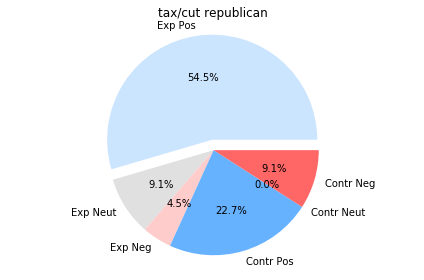

In [17]:
# Pie chart
import matplotlib.patches
labels = ['Exp Pos', 'Exp Neut', 'Exp Neg', 'Contr Pos', 'Contr Neut', 'Contr Neg']
explode = (0.1, 0, 0, 0, 0, 0)  
colors = ['#CCE5FF','#E0E0E0','#FFCCCC','#66B2FF', '#A0A0A0', '#FF6666']
fig = plt.figure()
plt.subplot(111)
plt.pie(percentages, explode = explode, labels = labels,  colors = colors, autopct='%1.1f%%',
        shadow=False, radius = 1.0)    
plt.gca().axis("equal")
plt.title(title)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.75)
plt.tight_layout()
plt.show()

#fig.savefig("/Users/audha/cpsc590/PNG Files/wall.png")